# Deep Learning: Ex.1 - Single neuron

Submitted by: Hadas Khrilker


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


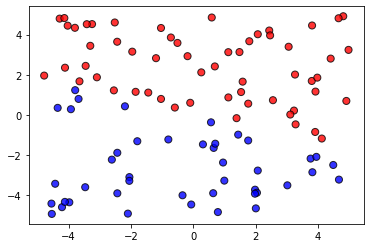

In [ ]:
def generate_data (n=100):
    w = np.array([1,3])
    n = 100
    X = np.random.random((n,2))*10-5 # random numbers between [-5,5]
    z = np.dot(X,w)
    g = 1/(1+np.exp(-z)) # sigmoid function
    y = np.zeros(n)
    y[g>0.5] = 1
    return X,y

X,y = generate_data()

plt.scatter(X[:,0],X[:,1],s=50,c=y, cmap='bwr', alpha=0.8, edgecolor='k')
plt.show()




### Gradient descent algorithm

- Implement the gradiet descent algorithm, based on the logistic loss as presented in class.

The function should start with an intial guess of $\vec{w}=(0,...,0)$ and perform $T$ update steps (with a learning rate of $\alpha$). At each step $t$ calculate the total loss $J_t=\sum_i{l_i}$ over all samples.

The function should return:

1. the final weight vector $\vec{w}$

2. all the history values of J:
$$ J = [J_1, J_2, ..., J_T] $$

3. all the history values of  $\vec{w}$:
$$ w_{history} = [\vec{w}_1,\vec{w}_2, ... \vec{w}_T ]$$


In [ ]:
def gradient_descent (X, y, alpha, T):
    n,d = X.shape
    w = np.zeros(d) # init w
    w_history = np.zeros((T,d))
    J_history = np.zeros(T)

    for t in range(T):

        # **********************************
        #  place your code here..
        #  (no need to use any loops here..)
        # **********************************

        w_history[t]=w #save weight history
        z=X*w
        #print(z)
        z=z.sum(axis=1) #w*x
        #print(z)
        y_predicted=1/(1+np.exp(-z)) #sigmoid
        #print(y_predicted)
        loss = -y*np.log(y_predicted) - (1-y)*np.log(1-y_predicted) # logistic loss
        #print(loss)
        J_history[t] = np.sum(loss)#save loss history
        #print(J_history)
        gradient=(y_predicted-y)#y_hat-y
        #print(gradient)

        gradient = X*gradient[:, np.newaxis] #(y_hat-y)*xi

        gradient=gradient.sum(axis=0)#sigma

        gradient=alpha*(gradient)#alpha*sig(y_hat-y)*xij

        w=w-gradient#wj-alph*gradient


    return w, J_history, w_history



- run your function on the 2D data we generated.
- plot the history values of J.
- if J didn't converge, change the values of $\alpha$ or $T$.

In [ ]:
#  place your code here..
w, J_history,w_history= gradient_descent(X, y, 0.001,3000 )
print(J_history)


[69.31471806 54.60628353 45.70570938 ...  2.64718508  2.64672441
  2.64626396]


- use the visualization provided in class, to plot the data points on top of the blue-white-red separation plane.

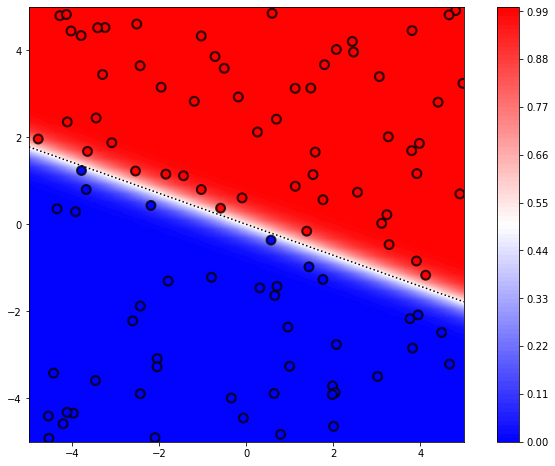

In [ ]:
#  place your code here..

x1_set = np.linspace(-5, 5, num=50)
x2_set = np.linspace(-5, 5, num=50)
x1,x2 = np.meshgrid(x1_set, x2_set)
z = w[0]*x1 + w[1]*x2
g = 1/(1+np.exp(-z)) # sigmoid

plt.figure(figsize=(10,8))
plt.contourf(x1_set,x2_set,g,levels=100, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()

plt.contour(x1_set,x2_set,g, levels=[0.5], colors='black',linestyles=':')
plt.scatter(X[:,0],X[:,1],s=50,c=y, cmap='bwr', alpha=0.8, edgecolor='k')
plt.scatter(X[:,0], X[:,1], s=80, c=y, cmap='bwr', alpha=0.8, edgecolor='k',linewidth=2)
plt.axis('square')
plt.show()


- calculate $\hat{y}_i$ for all samples, using the final weight vector you found.
- assume $\hat{y}_i > 0.5$ implies a label of `1` and `0` otherwise. how many of the samples classified correctly?

In [ ]:
# place your code here..
y_hat=w*X
y_hat=y_hat.sum(axis=1)
y_hat_sigmoid=1/(1+np.exp(-y_hat)) #sigmoid
y_hat_sigmoid = [1 if a_> 0.5 else 0 for a_ in y_hat_sigmoid]
y_hat_sigmoid = np.array(y_hat_sigmoid)
print(np.sum(y_hat_sigmoid == y))



100


- **remember to fill in your names on the top of this notebook.**
- submit a single `ipynb` file in moodle.

## Good Luck!